# Tas notebook
### one variable + one realization: Import/open/subset/visualize

### Next challenge: join netcdfs with xarray, average values across xarray obj
https://docs.xarray.dev/en/stable/user-guide/combining.html

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import cartopy
import cartopy.crs
import cartopy.feature as cfeature
import seaborn  

In [4]:
import xarray as xr
import regionmask
import os
#this variable is only checked 
#at first import of GeoPandas.
#toggles on PYGEOS
#os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [5]:
import earthpy 
import netCDF4 as nc
import cftime
#assists gpd with shp opening
import fiona #help(fiona.open)
import rasterio
import odc.geo.xr

In [6]:
#for clipping xarray 
import rioxarray as rio
from shapely.geometry import mapping
from shapely.geometry import Polygon

#for masking region
import seaborn as sns

In [7]:
#import h5netcdf
#import xmip as xmip
#import intake as intake
#import intake_esm as intake_esm
import rasterio
from affine import Affine
#import nc_time_axis
import cftime
from shapely.geometry import mapping, Polygon
import datetime
import warnings
from datetime import datetime, timedelta
#import regions
from osgeo import gdal,osr,ogr

In [8]:
#retrieving directory
os.getcwd()
#'/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal'

'/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal'

In [9]:
#os.chdir("/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal")

In [10]:
#creating path to CESM2 historical tas r4
path_tas_hist_r4 = "/Users/jenniferbadger/Dropbox/Climatology/Data_new/temp_hist/tas_Amon_CESM2_historical_r4i1p1f1_gn_185001-201412.nc"

In [11]:
#opening netcdf
tas_hist_r4 = nc.Dataset(path_tas_hist_r4)

In [12]:
#nc.Dataset(path_tas_hist_r4).close()

In [13]:
#retrieves metadata

#variable_id: tas
#frequency: mon
#experiment_id: historical
#nominal_resolution: 100 km = approx. hortizonal res
#realization_index: 4
#parent_time_units: days since 0001-01-01 00:00:00
print (tas_hist_r4)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    case_id: 18
    cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact: cesm_cmip6@ucar.edu
    creation_date: 2019-01-18T18:44:34Z
    data_specs_version: 01.00.29
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    grid: native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label: gn
    initialization_index: 1
    institution: National Center for Atmospheric Research, Climate and Global Dynamics Laboratory, 1850 Table Mesa Drive, Boulder, CO 80305, USA
    institution_id: NCAR
    license: CMIP6 model data produced by <The National Center for Atmospheric Research> is licensed under a Creative Commons Attribution-[]ShareAlike 4.0 International License (https://creativecommons.org/licenses/). Consult https://p

In [14]:
#issues a warning but not an error
#xarray seems to work
tas_hist_r4 = xr.open_dataset(path_tas_hist_r4, decode_times= True, use_cftime= True, decode_coords="all")

/Users/jenniferbadger/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/var/folders/19/knjb5nd52n90p_gwnf3k939c0000gn/T/ipykernel_52620/3448582648.py:3: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacella']
  tas_hist_r4 = xr.open_dataset(path_tas_hist_r4, decode_times= True, use_cftime= True, decode_coords="all")


In [15]:
#more condensed metadata
print(tas_hist_r4)

#The specification seconds since 1992-10-8 15:15:42.5 -6:00 
#indicates seconds since October 8th, 1992 at 3 hours, 15 minutes and 42.5 seconds 
#in the afternoon in the time zone which is six hours to the west of 
#Coordinated Universal Time (i.e. Mountain Daylight Time). 
#The time zone specification can also be written without a colon 
#using one or two digits (indicating hours) 
#or three or four digits (indicating hours and minutes).

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                18
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-18T18:44:34Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  182500.0
    branch_time_in_child:   674885.0
    

In [16]:
#tas specific metada
#units:K
print(tas_hist_r4['tas'])

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)>
[109486080 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas


In [17]:
#metadata again here under attributes
tas_hist_r4

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                18
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-18T18:44:34Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  182500.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [18]:
#shows time interval
tas_hist_r4.time.values

#see 4.4 time coordinate 
#for climate & forcasting conventions
#https://cfconventions.org/Data/cf-conventions/cf-conventions-1.10/cf-conventions.html

array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [19]:
#-90 to 90 as expected
tas_hist_r4.lat_bnds.values

array([[-90.       , -89.52879  ],
       [-89.52879  , -88.58639  ],
       [-88.58639  , -87.64398  ],
       [-87.64398  , -86.70157  ],
       [-86.70157  , -85.75916  ],
       [-85.75916  , -84.81676  ],
       [-84.81676  , -83.874344 ],
       [-83.874344 , -82.93194  ],
       [-82.93194  , -81.98953  ],
       [-81.98953  , -81.04712  ],
       [-81.04712  , -80.10471  ],
       [-80.10471  , -79.1623   ],
       [-79.1623   , -78.219894 ],
       [-78.219894 , -77.27749  ],
       [-77.27749  , -76.335075 ],
       [-76.335075 , -75.39267  ],
       [-75.39267  , -74.450264 ],
       [-74.450264 , -73.50785  ],
       [-73.50785  , -72.565445 ],
       [-72.565445 , -71.62304  ],
       [-71.62304  , -70.680626 ],
       [-70.680626 , -69.73822  ],
       [-69.73822  , -68.795815 ],
       [-68.795815 , -67.8534   ],
       [-67.8534   , -66.910995 ],
       [-66.910995 , -65.96859  ],
       [-65.96859  , -65.02618  ],
       [-65.02618  , -64.08377  ],
       [-64.08377  ,

In [20]:
#approx 0-360 as expected
tas_hist_r4.lon_bnds.values

array([[ -0.625,   0.625],
       [  0.625,   1.875],
       [  1.875,   3.125],
       [  3.125,   4.375],
       [  4.375,   5.625],
       [  5.625,   6.875],
       [  6.875,   8.125],
       [  8.125,   9.375],
       [  9.375,  10.625],
       [ 10.625,  11.875],
       [ 11.875,  13.125],
       [ 13.125,  14.375],
       [ 14.375,  15.625],
       [ 15.625,  16.875],
       [ 16.875,  18.125],
       [ 18.125,  19.375],
       [ 19.375,  20.625],
       [ 20.625,  21.875],
       [ 21.875,  23.125],
       [ 23.125,  24.375],
       [ 24.375,  25.625],
       [ 25.625,  26.875],
       [ 26.875,  28.125],
       [ 28.125,  29.375],
       [ 29.375,  30.625],
       [ 30.625,  31.875],
       [ 31.875,  33.125],
       [ 33.125,  34.375],
       [ 34.375,  35.625],
       [ 35.625,  36.875],
       [ 36.875,  38.125],
       [ 38.125,  39.375],
       [ 39.375,  40.625],
       [ 40.625,  41.875],
       [ 41.875,  43.125],
       [ 43.125,  44.375],
       [ 44.375,  45.625],
 

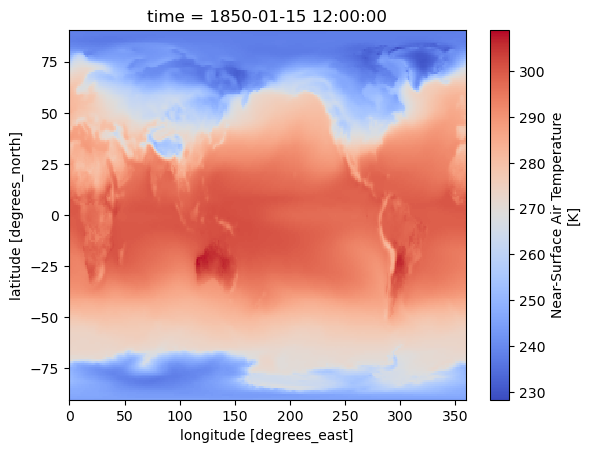

In [21]:
#For xarray datasets, .sel returns a new dataset 
#using a dimension shared by all of the datasets
#in the array, eg (time= specific entry I want to visualize)

#cftime decodes time units + variable values 
#in a netcdf conforming to Climate and Forecasting (CF) netCDF conventions
#https://unidata.github.io/cftime/api.html

#.plot uses matplotlib to visualize the dataset

#cftime.datetime(int year, int month, int day, int hour=0, 
#int minute=0, int second=0, int microsecond=0, 
#int dayofwk=-1, int dayofyr=-1)

#1850 = yr, #1 = Jan, 15=15th, 12,0,0,0= hour/min/sec/microsec
#2= integer day of week- Jan 15th, 1850= Tuesday
#15= integer day of year
tas_global_Jan1850 = tas_hist_r4['tas'].sel(time=cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, 2, 15)).plot(cmap = 'coolwarm')

tas_global_Jan1850

#w/o #int dayofwk=-1, int dayofyr=-1
#yeilds same result

#could make extent with Google Earth Pro
#and use to subset

In [22]:
lat = tas_hist_r4.variables['lat'][:]
lon = tas_hist_r4.variables['lon'][:]

In [23]:
#So Cal counties shp
#from County of LA Enterprise GIS
#https://egis-lacounty.hub.arcgis.com/datasets/lacounty::county-boundaries/explore?location=33.969439%2C-118.754050%2C6.00
#for AOI construction

cali_county_shp = ("/Users/jenniferbadger/Dropbox/Climatology/Data_new/County_Boundaries.zip")

In [24]:
county_gdf = gpd.read_file(cali_county_shp)
county_gdf

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
0,14,Other County,KERN COUNTY,2.254539e+11,2.297113e+06,"MULTIPOLYGON (((-13094857.732 4271549.305, -13..."
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-13126431.355 4021698.860, -13126430..."
2,16,Other County,RIVERSIDE COUNTY,8.300114e+10,1.312613e+06,"POLYGON ((-12942717.828 3952272.640, -12942869..."
3,17,Other County,SAN BERNARDINO COUNTY,2.739830e+11,2.335592e+06,"POLYGON ((-12941319.720 4033413.843, -12941393..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-12942717.828 3952272.640, -12..."
5,19,Other County,SAN LUIS OBISPO COUNTY,8.826784e+10,2.013038e+06,"POLYGON ((-13299646.133 4150459.185, -13300190..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-13299646.133 4150459.185, -13..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-13233732.749 4135263.477, -13..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-13106614.892 4139887.600, -13..."
9,23,LA County,LOS ANGELES COUNTY,2.083714e+09,4.055774e+05,"MULTIPOLYGON (((-13203038.399 3959049.207, -13..."


In [25]:
county_gdf.columns 

Index(['OBJECTID', 'TYPE', 'NAME', 'ShapeSTAre', 'ShapeSTLen', 'geometry'], dtype='object')

In [26]:
#creating a list of Bight Counties
#this didn't work with isin
#bight_counties = ["SANTA BARBARA COUNTY", "VENTURA COUNTY", 
#"LOS ANGELES COUNTY", "ORANGE COUNTY", "SAN DIEGO COUNTY"]

In [27]:
#creating shp subset for AOI
bight_counties_aoi=county_gdf[county_gdf['NAME'].isin(["SANTA BARBARA COUNTY", "VENTURA COUNTY", "LOS ANGELES COUNTY", "ORANGE COUNTY", "SAN DIEGO COUNTY"])]

bight_counties_aoi

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-13126431.355 4021698.860, -13126430..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-12942717.828 3952272.640, -12..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-13299646.133 4150459.185, -13..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-13233732.749 4135263.477, -13..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-13106614.892 4139887.600, -13..."
9,23,LA County,LOS ANGELES COUNTY,2.083714e+09,4.055774e+05,"MULTIPOLYGON (((-13203038.399 3959049.207, -13..."
10,24,LA County,LOS ANGELES COUNTY,1.573226e+09,3.575864e+05,"MULTIPOLYGON (((-13201512.023 3899597.281, -13..."


In [28]:
bight_counties_aoi.drop([9,10], axis=0, inplace=True)

/var/folders/19/knjb5nd52n90p_gwnf3k939c0000gn/T/ipykernel_52620/573277902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bight_counties_aoi.drop([9,10], axis=0, inplace=True)


In [29]:
bight_counties_aoi

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-13126431.355 4021698.860, -13126430..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-12942717.828 3952272.640, -12..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-13299646.133 4150459.185, -13..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-13233732.749 4135263.477, -13..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-13106614.892 4139887.600, -13..."


In [30]:
bight_counties_aoi.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
bight_counties_aoi.geometry

1    POLYGON ((-13126431.355 4021698.860, -13126430...
4    MULTIPOLYGON (((-12942717.828 3952272.640, -12...
6    MULTIPOLYGON (((-13299646.133 4150459.185, -13...
7    MULTIPOLYGON (((-13233732.749 4135263.477, -13...
8    MULTIPOLYGON (((-13106614.892 4139887.600, -13...
Name: geometry, dtype: geometry

In [32]:
#projecting shp to CA State Plane Zone 6
bight_counties_aoi = bight_counties_aoi.to_crs('EPSG:26946')

In [33]:
#chcking crs
bight_counties_aoi.crs

<Derived Projected CRS: EPSG:26946>
Name: NAD83 / California zone 6
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot: >

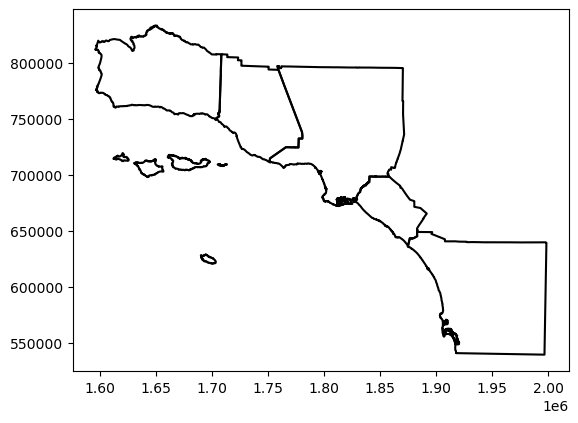

In [34]:
bight_counties_aoi.boundary.plot(color='k')

In [35]:
bight_counties_aoi.iloc[0]

OBJECTID                                                     15
TYPE                                               Other County
NAME                                              ORANGE COUNTY
ShapeSTAre                                   22100480210.613281
ShapeSTLen                                        701016.219095
geometry      POLYGON ((1845928.1172258179 698690.6788062968...
Name: 1, dtype: object

In [36]:
bight_counties_aoi.iloc[4]

OBJECTID                                                     22
TYPE                                                  LA County
NAME                                         LOS ANGELES COUNTY
ShapeSTAre                                  110204668151.496094
ShapeSTLen                                       2284698.514535
geometry      MULTIPOLYGON (((1863770.1654286545 795637.3992...
Name: 8, dtype: object

In [37]:
#this looks at the bounds
#of the bight shapefile
#array of #s that are not lat/lon
#this is due to the projection
#asociated with the shapefile
bight_counties_aoi.total_bounds

array([1595827.06438072,  539561.74676963, 1998473.69160888,
        833412.29367095])

In [38]:
#in order to rectify, reproject to 4326
#EPSG:4326 = GCS that uses the WGS84 ellipsoid for lat/lon

#reprojecting to CRS that 
#can handle lat/lon
#for the - get_aoi below
bight_counties_aoi = bight_counties_aoi.to_crs("EPSG:4326") 

In [39]:
bight_counties_LA = bight_counties_aoi.iloc[4]

In [40]:
#from https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/summarize-climate-data-by-season/

#makes a function to convert a gpd object
#to lat/lon extent

def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    #formats for the 0-360 lon values
    if world:
        aoi_lon[0] = aoi_lon[0] + 360
        aoi_lon[1] = aoi_lon[1] + 360
    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

In [41]:
#lat:-90 to 90
#lon: 0-360
bight_bounds = get_aoi(bight_counties_aoi, world = True)
bight_bounds

{'lon': [239.32789705243422, 243.73358756684988],
 'lat': [32.52338130617983, 35.114524016854006]}

In [42]:
#divides xarray according to time slice
#and lat/lon slice
#Lat/lon slice is working
#returns 4680 values
Bight_tas = tas_hist_r4["tas"].sel(
    time=slice("1950-01-15", "2014-12-15"),
    lon=slice(bight_bounds["lon"][0], bight_bounds["lon"][1]),
    lat=slice(bight_bounds["lat"][0], bight_bounds["lat"][1]))
Bight_tas


<xarray.DataArray 'tas' (time: 780, lat: 2, lon: 3)>
[4680 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 33.46 34.4
  * lon      (lon) float64 240.0 241.2 242.5
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [43]:
print("Time Period start:", Bight_tas.time.min().values)
print("Time Period end:", Bight_tas.time.max().values)

Time Period start: 1950-01-15 12:00:00
Time Period end: 2014-12-15 12:00:00


In [44]:
bight_region = regionmask.from_geopandas(bight_counties_aoi,
                                         names="name",
                                         name="name")

In [45]:
#create the regionmask
#using aoi as WGS84
bight_mask = regionmask.mask_3D_geopandas(bight_counties_aoi,
                                         tas_hist_r4.lon,
                                          tas_hist_r4.lat)

# Mask the netcdf data
#Bight_tas is my sliced array
bight_tas_masked = Bight_tas.where(bight_mask)
bight_tas_masked.dims

#'time', 'lat', 'lon', 'region'

('time', 'lat', 'lon', 'region')

In [46]:
Bight_tas.values.shape

(780, 2, 3)

In [47]:
bight_tas_masked.lat
#seems correct for So-CAl
#([33.455497, 34.397906])

<xarray.DataArray 'lat' (lat: 2)>
array([33.455497, 34.397906])
Coordinates:
  * lat      (lat) float64 33.46 34.4
Attributes:
    axis:           Y
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0

In [48]:
bight_tas_masked.lon
#these coors are zero to 360 

<xarray.DataArray 'lon' (lon: 3)>
array([240.  , 241.25, 242.5 ])
Coordinates:
  * lon      (lon) float64 240.0 241.2 242.5
Attributes:
    axis:           X
    standard_name:  longitude
    title:          Longitude
    type:           double
    units:          degrees_east
    valid_max:      360.0
    valid_min:      0.0

In [49]:
bight_tas_masked.time #780

<xarray.DataArray 'time' (time: 780)>
array([cftime.DatetimeNoLeap(1950, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes:
    axis:           T
    standard_name:  time
    title:          time
    type:           double

In [50]:
#bight_tas_masked_mean_time = bight_tas_masked.groupby('time.month').mean('time')

#4 arrays- mean averaged across seasons
bight_season_summary = bight_tas_masked.groupby(
    'time.season').mean()

#bight_tas_masked_mean_time.shape
#bight_tas_masked_mean_time.dims

bight_season_summary.dims

('season', 'lat', 'lon', 'region')

In [51]:
bight_season_summary.season.values

array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)

In [52]:
#See http://meteo.unican.es/work/xarray_seminar/xArray_seminar.html
#Example 2 for grouping and averaging

#Also see this
#https://kpegion.github.io/Pangeo-at-AOES/examples/advanced-analysis.html
#use this to average across ensembles


In [53]:
#sns.set(font_scale=1.3)
#sns.set_style("white")


#bight_tas_mean_time = bight_tas_masked.groupby('time.season').mean('time')

#Error message says can only plot 1D or 2D

#da.squeeze().plot.imshow()

#Only 1d and 2d plots are supported for facets in xarray. 
#See the package `Seaborn` for more options.
bight_season_summary.plot(col='month', col_wrap=2, figsize=(10, 10))


#bight_tas_mean_time.dims

#plt.suptitle("Mean Temperature Across 1950- 2014 By Season in the SoCal Bight",
             #y=1.05)

#plt.show()

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

In [ ]:
#close netcdf
#nc.Dataset(path_tas_hist_r4).close()

In [ ]:
#tas_hist_r4 = rio.open_rasterio(path_tas_hist_r4)

In [57]:
#starting again with a newly sliced ds
#time slice is working. 

#divides xarray according to time slice 
#and 'tas' variable
tasr4_1950_2014 = tas_hist_r4["tas"].sel(
    time=slice("1950-01-15", "2014-12-15"))
    
tasr4_1950_2014 #65yrs = 780months

<xarray.DataArray 'tas' (time: 780, lat: 192, lon: 288)>
[43130880 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [58]:
#shows correct period...
print("Time Period start:", tasr4_1950_2014.time.min().values)
print("Time Period end:", tasr4_1950_2014.time.max().values)

Time Period start: 1950-01-15 12:00:00
Time Period end: 2014-12-15 12:00:00


In [59]:
tasr4_1950_2014.dims

('time', 'lat', 'lon')

In [60]:
tasr4_1950_2014.variable

<xarray.Variable (time: 780, lat: 192, lon: 288)>
[43130880 values with dtype=float32]
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [61]:
#burnarea data variable?
#doesn't work for 'tas'
tasr4_1950_2014 = tasr4_1950_2014.squeeze().transpose('time', 'lat', 'lon')

#converting lon from 0-360 to -180 > +180
#tasr4_1950_2014.coords["x"] = ((tasr4_1950_2014.lon + 180) % 360) - 180
tasr4_1950_2014.coords["lon"] = tasr4_1950_2014.lon
tasr4_1950_2014.coords["lat"] = tasr4_1950_2014.lat
tasr4_1950_2014.coords["time"] = tasr4_1950_2014.time

In [62]:
tasr4_1950_2014.coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00

In [63]:
tasr4_1950_2014.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

<xarray.DataArray 'tas' (time: 780, lat: 192, lon: 288)>
[43130880 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [64]:
tasr4_1950_2014.lon.values

array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
        10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
        20.  ,  21.25,  22.5 ,  23.75,  25.  ,  26.25,  27.5 ,  28.75,
        30.  ,  31.25,  32.5 ,  33.75,  35.  ,  36.25,  37.5 ,  38.75,
        40.  ,  41.25,  42.5 ,  43.75,  45.  ,  46.25,  47.5 ,  48.75,
        50.  ,  51.25,  52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,
        60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,  68.75,
        70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,  78.75,
        80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,  87.5 ,  88.75,
        90.  ,  91.25,  92.5 ,  93.75,  95.  ,  96.25,  97.5 ,  98.75,
       100.  , 101.25, 102.5 , 103.75, 105.  , 106.25, 107.5 , 108.75,
       110.  , 111.25, 112.5 , 113.75, 115.  , 116.25, 117.5 , 118.75,
       120.  , 121.25, 122.5 , 123.75, 125.  , 126.25, 127.5 , 128.75,
       130.  , 131.25, 132.5 , 133.75, 135.  , 136.25, 137.5 , 138.75,
      

In [65]:
#ca shapefile
CA_gdf = gpd.read_file("/Users/jenniferbadger/Dropbox/Climatology/Data_new/ca-state-boundary/CA_State_TIGER2016.shp", crs="epsg:3083")

In [66]:
CA_gdf = CA_gdf.to_crs("EPSG:4326") 

In [67]:
#now these look like lat/lon values
CA_gdf.geometry.values

<GeometryArray>
[<MULTIPOLYGON (((-119.635 33.265, -119.636 33.273, -119.636 33.281, -119.635...>]
Length: 1, dtype: geometry

In [68]:
CA_gdf

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [69]:
#writing CRS to xarray to match
tasr4_1950_2014.rio.write_crs('EPSG:4326', inplace=True)

<xarray.DataArray 'tas' (time: 780, lat: 192, lon: 288)>
[43130880 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon          (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time         (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
    spatial_ref  int64 0
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [70]:
#lon conversion equation
tasr4_1950_2014.coords["lon"] = ((tasr4_1950_2014.coords['lon'] + 180) % 360) - 180
tasr4_1950_2014 = tasr4_1950_2014.sortby(["time", "lat", "lon"])

In [71]:
#tasr4_1950_2014["lon"] = tasr4_1950_2014["lon"] - 180

In [72]:
tasr4_1950_2014.lon

<xarray.DataArray 'lon' (lon: 288)>
array([-180.  , -178.75, -177.5 , ...,  176.25,  177.5 ,  178.75])
Coordinates:
  * lon          (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
    spatial_ref  int64 0

In [73]:
tasr4_1950_2014.coords

Coordinates:
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon          (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * time         (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
    spatial_ref  int64 0

In [74]:
tasr4_1950_2014.dims

('time', 'lat', 'lon')

In [75]:
#NoDataInBounds: No data found in bounds. Data variable: tas
#despite converting lon and matching CRS, no data in bounds
clipped = tasr4_1950_2014.rename(lon="x", lat="y").rio.clip(CA_gdf.geometry.apply(mapping), CA_gdf.crs, all_touched=True)

#clipped = tasr4_1950_2014.rio.clip(CA_gdf.geometry.values, CA_gdf.crs, drop=False, invert=True)

#.mean() is being used to 
#clipped = tasr4_1950_2014.rio.clip(bight_counties_aoi.geometry.apply(mapping), 
                                   #bight_counties_aoi.crs, drop=False, invert=True)#.mean(dim=['lon','lat']).values

In [76]:
bight_counties_aoi

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-117.91674 33.94708, -117.91673 33.9..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-116.26641 33.42815, -116.2832..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-119.47275 34.90117, -119.4628..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-118.88064 34.78914, -118.8804..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-117.73872 34.82325, -117.7342..."


<AxesSubplot: >

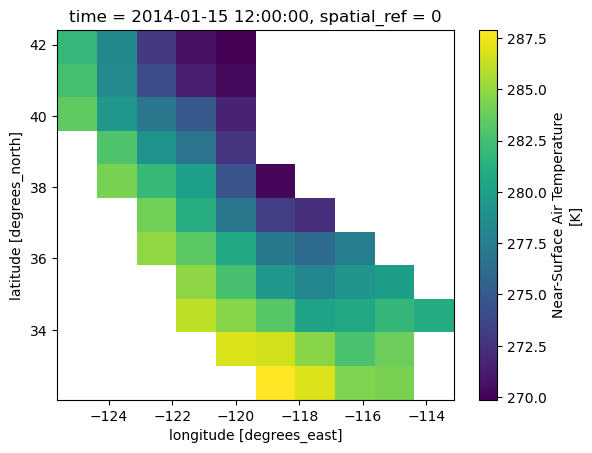

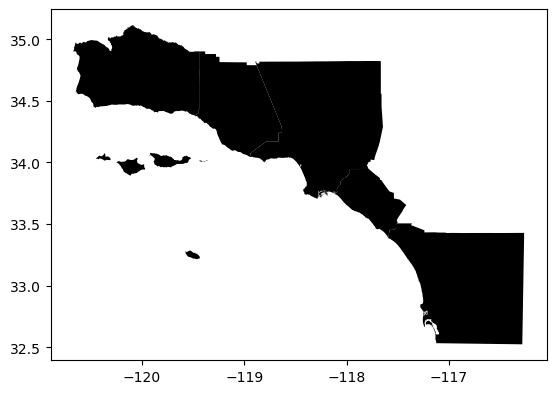

In [80]:
#this actually seems to work
#however, despite spatial extent correctly
#lining up with the shapefile extent
#the netcdf info underlay is likely 
#a different park of the worls
clipped.sel(time='2014-01-15').plot()
#23 degree farenheit in SB mtns
#44 degre farenheit near SD

bight_counties_aoi.plot(color = 'k')

In [81]:
clipped.x

<xarray.DataArray 'x' (x: 10)>
array([-125.  , -123.75, -122.5 , -121.25, -120.  , -118.75, -117.5 , -116.25,
       -115.  , -113.75])
Coordinates:
  * x            (x) float64 -125.0 -123.8 -122.5 ... -116.2 -115.0 -113.8
    spatial_ref  int64 0
Attributes:
    axis:           X
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [82]:
clipped.y

<xarray.DataArray 'y' (y: 11)>
array([32.513089, 33.455497, 34.397906, 35.340314, 36.282723, 37.225131,
       38.167539, 39.109948, 40.052356, 40.994764, 41.937173])
Coordinates:
  * y            (y) float64 32.51 33.46 34.4 35.34 ... 39.11 40.05 40.99 41.94
    spatial_ref  int64 0
Attributes:
    axis:           Y
    standard_name:  latitude
    title:          Latitude
    type:           double
    units:          degrees_north
    valid_max:      90.0
    valid_min:      -90.0
    long_name:      latitude

Text(0.5, 1.0, 'CA Climate Jan 15th, 2014')

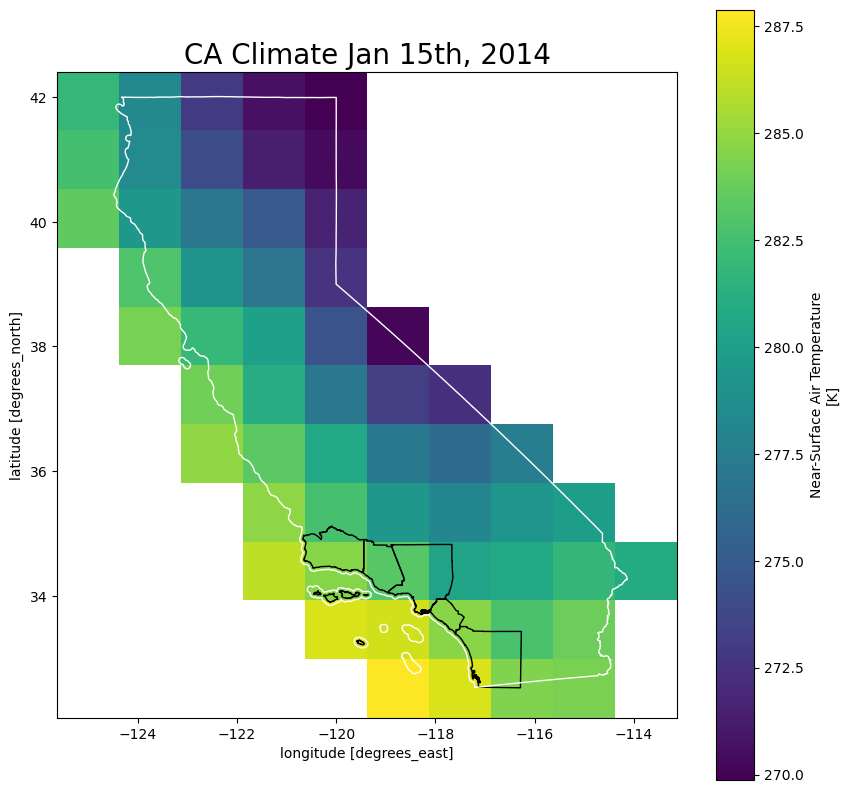

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
clipped.sel(time='2014-01-15').plot(ax=ax)
bight_counties_aoi.plot(ax=ax, facecolor='none', edgecolor='black')
CA_gdf.plot(ax=ax, facecolor='none', edgecolor='white')
plt.title(label="CA Climate Jan 15th, 2014",
          fontsize=20,
          color="Black")

In [88]:
bight_counties_aoi

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-117.91674 33.94708, -117.91673 33.9..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-116.26641 33.42815, -116.2832..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-119.47275 34.90117, -119.4628..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-118.88064 34.78914, -118.8804..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-117.73872 34.82325, -117.7342..."


In [91]:
new_lon = clipped['x'] % 360

new_lon.max

<bound method DataArrayAggregations.max of <xarray.DataArray 'x' (x: 10)>
array([235.  , 236.25, 237.5 , 238.75, 240.  , 241.25, 242.5 , 243.75,
       245.  , 246.25])
Coordinates:
  * x            (x) float64 -125.0 -123.8 -122.5 ... -116.2 -115.0 -113.8
    spatial_ref  int64 0>

In [96]:
bight_counties_aoi['geometry']

1    POLYGON ((-117.91674 33.94708, -117.91673 33.9...
4    MULTIPOLYGON (((-116.26641 33.42815, -116.2832...
6    MULTIPOLYGON (((-119.47275 34.90117, -119.4628...
7    MULTIPOLYGON (((-118.88064 34.78914, -118.8804...
8    MULTIPOLYGON (((-117.73872 34.82325, -117.7342...
Name: geometry, dtype: geometry

<AxesSubplot: title={'center': 'time = 2014-01-15 12:00:00'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

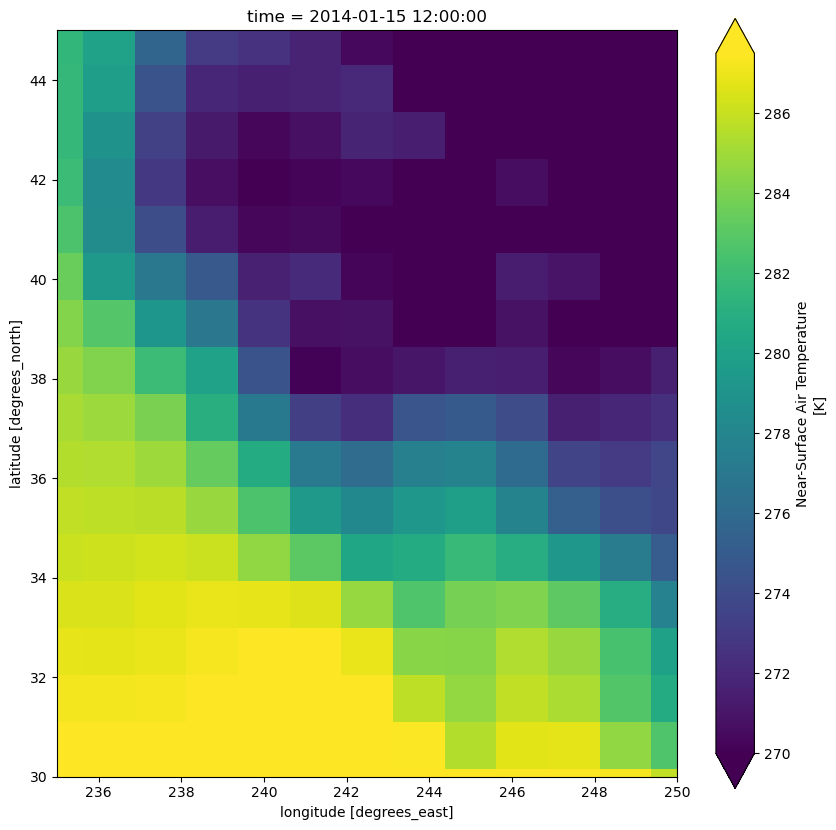

In [95]:
vmin= 270.0
vmax = 287.5
#tas_global_Jan1850 = tas_hist_r4['tas'].sel(time=cftime.DatetimeNoLeap(2014, 1, 15, 12, 0, 0, 0, 2, 15)).plot(xlim= (110, 130) , ylim=(25, 45),  vmin= vmin, vmax=vmax )


fig, ax = plt.subplots(figsize=(10, 10))
tas_hist_r4['tas'].sel(time=cftime.DatetimeNoLeap(2014, 1, 15, 12, 0, 0, 0, 2, 15)).plot(ax=ax, xlim= (235, 250),
                                                                                         ylim=(30, 45),  vmin= vmin, vmax=vmax )
#clipped.sel(time='2014-01-15').plot(ax=ax)
bight_counties_aoi.plot(ax=ax, facecolor='none', edgecolor='black')

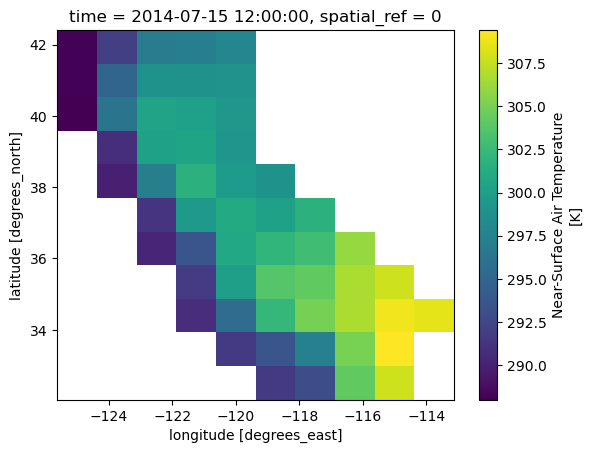

In [96]:
clipped.sel(time='2014-07-15').plot()
#69 degree farenheit in SB mtns
#82 degre farenheit near SD


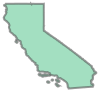

In [78]:
CA_gdf.loc[0].geometry

In [80]:
CA_gdf.loc[0].geometry.wkt[:100]

'MULTIPOLYGON (((-119.63473135373154 33.26544669363413, -119.63631435456492 33.273044694363136, -119.'

In [107]:
CA_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

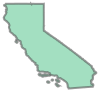

In [124]:
CA_gdf['geometry']

In [97]:
#this would only work for point geometry
#CA_gdf['latlon'] = CA_gdf.geometry.apply(
                        #lambda latlon: '{},{}'.format(geometry.y, geometry.x))
#CA_gdf


First try this:https://gis.stackexchange.com/questions/354782/masking-netcdf-time-series-data-from-shapefile-using-python

Here is an example of using rioxarray to mask out data with a shapefile: https://corteva.github.io/rioxarray/stable/examples/clip_geom.html

import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping


MSWEP_monthly2 = xarray.open_dataarray('D:\G3P\DATA\Models\MSWEP\MSWEP_monthly.nc4')
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = geopandas.read_file('D:\G3P\DATA\Shapefile\Africa_SHP\Africa.shp', crs="epsg:4326")

clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=False)



In [ ]:
#try this first
#https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile

#Read this article and consider re-opening dataset
#with rioxarray as it may be transposed using xarray
#https://medium.com/axionable-ai-and-blockchain/tips-to-handle-climate-data-with-python-702898e500db


#also see here for slicing to extent
#may be better to slice before projecting?